## Тестовое задание Продуктового аналитика

Кандидат: Гаврюшова Юлия Эдуардовна

### 1 Кейс

Время выполнения ≈ 1,5 ч.

**Массив по продажам. Проанализировать, выявить проблемы, обозначить выводы.**

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [295]:
path = "C:\\Users\\User\\OneDrive\\Рабочий стол\\mir_vkusa\\raw_data\\МАССИВ_СТРУКТУРА ПРОДАЖ_отпр.xlsx"

In [296]:
df = pd.read_excel(path)

Проверяем какие типы данных и наличие NaN

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Месяц                                   553 non-null    int64  
 1   Канал сбыта                             553 non-null    object 
 2   Производитель (из тов. категории)       553 non-null    object 
 3   Номенклатура нормализованная            553 non-null    object 
 4   Публичное наименование нормализованное  553 non-null    object 
 5   Сегмент.Код                             553 non-null    float64
 6   Вес                                     553 non-null    float64
 7   Цена за кг СНДС                         553 non-null    float64
 8   Сумма с НДС                             553 non-null    float64
 9   Менеджер                                553 non-null    object 
 10  Тип упаковки                            553 non-null    object

In [298]:
df = df.rename(columns={'Цена за кг СНДС': 'Цена за кг с НДС'})

Проверяем на полные дубликаты

In [299]:
df.duplicated().sum()

0

Проверяем на отрицательные значения в числовых полях

In [300]:
df[df['Сумма с НДС'] <= 0]

,Месяц,Канал сбыта,Производитель (из тов. категории),Номенклатура нормализованная,Публичное наименование нормализованное,Сегмент.Код,Вес,Цена за кг с НДС,Сумма с НДС,Менеджер,Тип упаковки,Марка (Бренд),Форма продукта


In [301]:
df[df['Вес'] <= 0]

,Месяц,Канал сбыта,Производитель (из тов. категории),Номенклатура нормализованная,Публичное наименование нормализованное,Сегмент.Код,Вес,Цена за кг с НДС,Сумма с НДС,Менеджер,Тип упаковки,Марка (Бренд),Форма продукта


In [302]:
df[df['Цена за кг с НДС'] <= 0]

,Месяц,Канал сбыта,Производитель (из тов. категории),Номенклатура нормализованная,Публичное наименование нормализованное,Сегмент.Код,Вес,Цена за кг с НДС,Сумма с НДС,Менеджер,Тип упаковки,Марка (Бренд),Форма продукта


Проверяем уникальные значения в ключевых полях

In [303]:
print('Месяц:', df['Месяц'].unique())
print('Канал сбыта:', df['Канал сбыта'].unique())
print('Производитель (из тов. категории):', df['Производитель (из тов. категории)'].unique())
print('Менеджер:', df['Менеджер'].unique())
print('Марка (Бренд):', df['Марка (Бренд)'].unique())

Месяц: [ 1  2 10]
Канал сбыта: ['4.1 Переработчики' '1.2.2 МСК партнеры' '1.1 Дистрибьюторы'
 '1.3.2 Крупный Опт']
Производитель (из тов. категории): ['Кобрин']
Менеджер: ['Женя' 'Оля' 'Вика' 'Саша' 'Света']
Марка (Бренд): ['Кобринские сыры' 'Сырная Династия' 'Мир Вкуса']


Преобразуем поле 'Канал сбыта'

In [271]:
df['Канал сбыта'] = df['Канал сбыта'].str.split().str[1:].str.join(' ')

Проверяем расчет поля 'Сумма с НДС'

Вес * Цена за кг с НДС ≈ Сумма с НДС

In [272]:
df['Расчетная сумма'] = df['Вес'] * df['Цена за кг с НДС']
df['Расхождение'] = df['Расчетная сумма'] - df['Сумма с НДС']

In [273]:
df.head(3)

,Месяц,Канал сбыта,Производитель (из тов. категории),Номенклатура нормализованная,Публичное наименование нормализованное,Сегмент.Код,Вес,Цена за кг с НДС,Сумма с НДС,Менеджер,Тип упаковки,Марка (Бренд),Форма продукта,Расчетная сумма,Расхождение
0,1,Переработчики,Кобрин,ЭЛЬТЕРМАНИ 50 ЦИЛИНДР КРУГ КОБРИН,ЭЛЬТЕРМАНИ КРУГ КОБРИН,2.1,7078.155,390.0,2760480.45,Женя,Термоусадочный пакет,Кобринские сыры,Круг,2760480.450,-4.656613e-10
1,1,МСК партнеры,Кобрин,ТИЛЬЗИТЕР СЛИВОЧНЫЙ 50 СД ЧЕТВЕРТЬ КУБИК КОБРИН,ТИЛЬЗИТЕР СД КУБИК КОБРИН,3.4,794.360,595.2,463347.01,Оля,Термоусадочный пакет,Сырная Династия,Кубик,472803.072,9.456062e+03
2,1,МСК партнеры,Кобрин,ЧЕРНЫЙ ПРИНЦ 50 СД ЦИЛИНДР КРУГ КОБРИН,ЧЕРНЫЙ ПРИНЦ СД КРУГ КОБРИН,3.4,9004.740,580.8,5125353.93,Оля,Термоусадочный пакет,Сырная Династия,Круг,5229952.992,1.045991e+05


Посмотрим сколько строк с расхождением более 1 руб.

In [274]:
df[df['Расхождение'] > 1]

,Месяц,Канал сбыта,Производитель (из тов. категории),Номенклатура нормализованная,Публичное наименование нормализованное,Сегмент.Код,Вес,Цена за кг с НДС,Сумма с НДС,Менеджер,Тип упаковки,Марка (Бренд),Форма продукта,Расчетная сумма,Расхождение
1,1,МСК партнеры,Кобрин,ТИЛЬЗИТЕР СЛИВОЧНЫЙ 50 СД ЧЕТВЕРТЬ КУБИК КОБРИН,ТИЛЬЗИТЕР СД КУБИК КОБРИН,3.4,794.360,595.2,463347.01,Оля,Термоусадочный пакет,Сырная Династия,Кубик,4.728031e+05,9456.0620
2,1,МСК партнеры,Кобрин,ЧЕРНЫЙ ПРИНЦ 50 СД ЦИЛИНДР КРУГ КОБРИН,ЧЕРНЫЙ ПРИНЦ СД КРУГ КОБРИН,3.4,9004.740,580.8,5125353.93,Оля,Термоусадочный пакет,Сырная Династия,Круг,5.229953e+06,104599.0620
5,1,МСК партнеры,Кобрин,ТИЛЬЗИТЕР СЛИВОЧНЫЙ 50 СД ЧЕТВЕРТЬ КУБИК КОБРИН,ТИЛЬЗИТЕР СД КУБИК КОБРИН,3.4,2397.420,595.2,1398405.49,Оля,Термоусадочный пакет,Сырная Династия,Кубик,1.426944e+06,28538.8940
6,1,МСК партнеры,Кобрин,ПАН КОБРЫНЪ 50 СД ЧЕТВЕРТЬ КУБИК КОБРИН,ПАН КОБРЫНЪ СД КУБИК КОБРИН,3.3,1600.564,571.2,895957.32,Оля,Термоусадочный пакет,Сырная Династия,Кубик,9.142422e+05,18284.8368
7,1,Дистрибьюторы,Кобрин,ТИЛЬЗИТЕР СЛИВОЧНЫЙ 50 СД ЧЕТВЕРТЬ КУБИК КОБРИН,ТИЛЬЗИТЕР СД КУБИК КОБРИН,3.4,924.784,590.0,534710.11,Вика,Термоусадочный пакет,Сырная Династия,Кубик,5.456226e+05,10912.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,10,Крупный Опт,Кобрин,ГРОССМЕЙСТЕР 50 МВ НИЗКИЙ ЦИЛИНДР КОЛЕСО КОБРИН,ГРОССМЕЙСТЕР МВ КОЛЕСО КОБРИН,5.2,204.570,793.8,133157.89,Света,Латекс,Мир Вкуса,Колесо,1.623877e+05,29229.7760
541,10,Дистрибьюторы,Кобрин,ЭЛЬТЕРМАНИ 50 ЦИЛИНДР КРУГ КОБРИН,ЭЛЬТЕРМАНИ КРУГ КОБРИН,2.1,423.225,545.0,226044.48,Саша,Термоусадочный пакет,Кобринские сыры,Круг,2.306576e+05,4613.1450
542,10,МСК партнеры,Кобрин,ТИЛЬЗИТЕР СЛИВОЧНЫЙ 50 СД ЧЕТВЕРТЬ КУБИК КОБРИН,ТИЛЬЗИТЕР СД КУБИК КОБРИН,3.4,1280.650,614.4,778963.05,Оля,Термоусадочный пакет,Сырная Династия,Кубик,7.868314e+05,7868.3100
544,10,Дистрибьюторы,Кобрин,ГРОССМЕЙСТЕР 50 МВ НИЗКИЙ ЦИЛИНДР КОЛЕСО КОБРИН,ГРОССМЕЙСТЕР МВ КОЛЕСО КОБРИН,5.2,499.355,730.0,357238.57,Вика,Латекс,Мир Вкуса,Колесо,3.645292e+05,7290.5800


In [275]:
df['Расхождение'].sum()

6580576.4943

343 строки с расхождением в Сумме с НДС более 1 руб. - это ≈ 6,5 млн. руб. Требуется уточнение причин такого расхождения (возможно, был применен дисконт).

Построим график динамики продаж по месяцам.

In [307]:
month_map = {
    1: 'январь',
    2: 'февраль',
    3: 'март',
    4: 'апрель',
    5: 'май',
    6: 'июнь',
    7: 'июль',
    8: 'август',
    9: 'сентябрь',
    10: 'октябрь',
    11: 'ноябрь',
    12: 'декабрь'
}

df['Месяц'] = df['Месяц'].map(month_map)

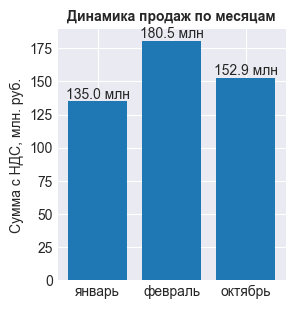

In [281]:
fig1 = plt.figure(figsize=(10, 15))

ax1 = plt.subplot(4, 3, 1)
monthly_sales = df.groupby('Месяц')['Расчетная сумма'].sum().reindex(['январь', 'февраль', 'октябрь'])
monthly_sales_mln = monthly_sales / 1_000_000
bars1 = ax1.bar(monthly_sales_mln.index, monthly_sales_mln.values)
ax1.set_title('Динамика продаж по месяцам', fontsize=10, fontweight='bold')
ax1.set_ylabel('Сумма с НДС, млн. руб.')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} млн',
             ha='center', 
             va='bottom')

Построим круговую диаграмму продаж по каналам сбыта.

Text(0.5, 1.0, 'Доля каналов сбыта')

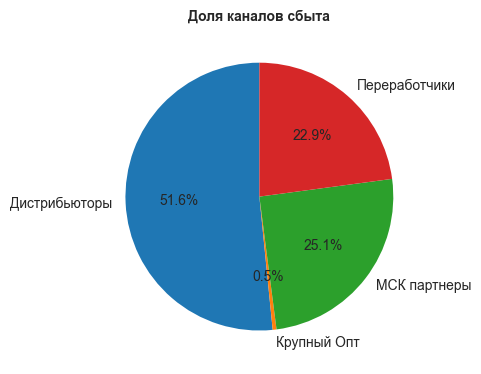

In [282]:
fig2 = plt.figure(figsize=(15, 20)) 
ax2 = plt.subplot(4, 3, 2)
channel_sales = df.groupby('Канал сбыта')['Расчетная сумма'].sum()
wedges, texts, autotexts = ax2.pie(channel_sales.values, labels=channel_sales.index, 
                                     autopct='%1.1f%%', startangle=90)
ax2.set_title('Доля каналов сбыта', fontsize=10, fontweight='bold')

Построим график продаж по менеджерам.

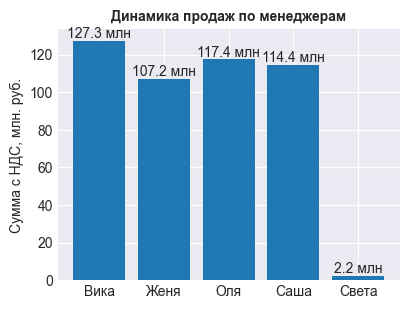

In [283]:
fig3 = plt.figure(figsize=(15, 15))

ax3 = plt.subplot(4, 3, 1)
monthly_sales = df.groupby('Менеджер')['Расчетная сумма'].sum()
monthly_sales_mln = monthly_sales / 1_000_000
bars3 = ax3.bar(monthly_sales_mln.index, monthly_sales_mln.values)
ax3.set_title('Динамика продаж по менеджерам', fontsize=10, fontweight='bold')
ax3.set_ylabel('Сумма с НДС, млн. руб.')

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} млн',
             ha='center', 
             va='bottom')

Посмотрим продажи по менеджерам и каналам сбыта.

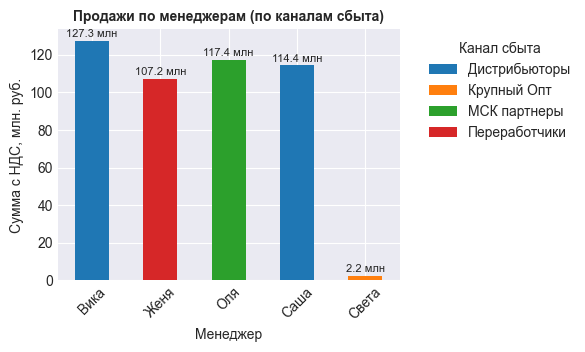

In [284]:
fig4 = plt.figure(figsize=(15, 15))

ax4 = plt.subplot(4, 3, 1)

pivot_manager_channel = pd.pivot_table(df, 
                                        values='Расчетная сумма',
                                        index='Менеджер',
                                        columns='Канал сбыта',
                                        aggfunc='sum',
                                        fill_value=0)

pivot_manager_channel_mln = pivot_manager_channel / 1_000_000

pivot_manager_channel_mln.plot(kind='bar', stacked=True, ax=ax4, linewidth=0.5)

ax4.set_title('Продажи по менеджерам (по каналам сбыта)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Сумма с НДС, млн. руб.')
ax4.set_xlabel('Менеджер')
ax4.legend(title='Канал сбыта', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.tick_params(axis='x', rotation=45)

for i, manager in enumerate(pivot_manager_channel_mln.index):
    total = pivot_manager_channel_mln.loc[manager].sum()
    ax4.text(i, total + 1, f'{total:.1f} млн', 
             ha='center', va='bottom', fontsize=8)

Также посмотрим ТОП-10 товаров по продажам

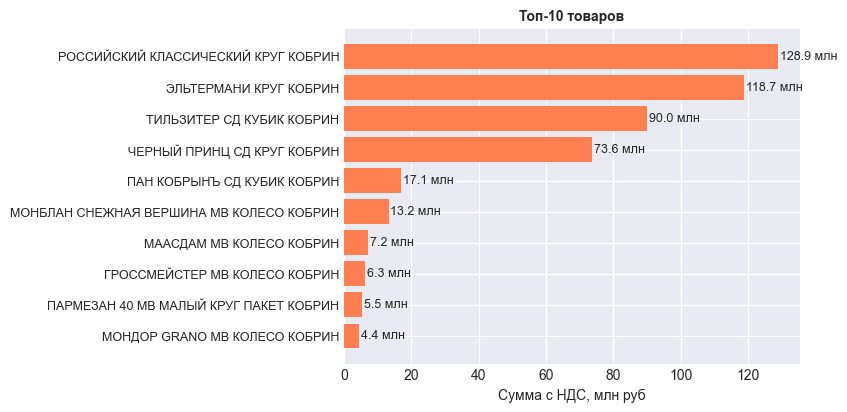

In [285]:
fig5 = plt.figure(figsize=(20, 20))

ax5 = plt.subplot(4, 3, 3)
top_products = df.groupby('Публичное наименование нормализованное')['Расчетная сумма'].sum().nlargest(10)
top_products_mln = top_products / 1_000_000

bars5 = ax5.barh(range(len(top_products_mln)), top_products_mln.values, 
                 color='coral')

ax5.set_yticks(range(len(top_products_mln)))
ax5.set_yticklabels(top_products_mln.index, fontsize=9)

ax5.set_title('Топ-10 товаров', fontsize=10, fontweight='bold')
ax5.set_xlabel('Сумма с НДС, млн руб', fontsize=10)

ax5.invert_yaxis()

for i, bar in enumerate(bars5):
    width = bar.get_width()
    ax5.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f} млн',
             ha='left', va='center', fontsize=9)

## Вывод:

**Проанализировав данные за 3 месяца, можно сделать вывод, что канал 'Крупный опт' показывает минимальную долю в структуре продаж — всего 0,5%. Это направление развивает менеджер Светлана. Требуется оценить, является ли это новым направлением (тогда доля может быть оправдана) или зоной роста, которую можно усилить за счет дополнительных ресурсов или пересмотра стратегии работы с крупными оптовиками.**

### 1 Кейс

Время выполнения ≈ 1,5 ч.

**Массив по данных по отдельной номенклатуре. Проанализировать, выявить проблемы, обозначить выводы.**

In [441]:
path2 = "C:\\Users\\User\\OneDrive\\Рабочий стол\\mir_vkusa\\raw_data\\ПАРМЕЗАН ПРОДАЖИ_отпр.xlsx"

In [442]:
df2 = pd.read_excel(path2)

Проверяем какие типы данных и наличие NaN

In [443]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Месяц                                   178 non-null    int64  
 1   Квартал                                 178 non-null    int64  
 2   Канал сбыта                             178 non-null    object 
 3   Публичное наименование нормализованное  178 non-null    object 
 4   Вес                                     178 non-null    float64
 5   Менеджер                                178 non-null    object 
 6   Годен до                                178 non-null    object 
 7   Срок годности                           178 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 11.3+ KB


Проверяем на полные дубликаты

In [444]:
df2.duplicated().sum()

0

Проверяем на отрицательные значения в числовых полях

In [445]:
df2[df2['Вес'] <= 0]

,Месяц,Квартал,Канал сбыта,Публичное наименование нормализованное,Вес,Менеджер,Годен до,Срок годности


In [446]:
df2[df2['Срок годности'] <= 0]

,Месяц,Квартал,Канал сбыта,Публичное наименование нормализованное,Вес,Менеджер,Годен до,Срок годности


Проверяем уникальные значения в ключевых полях

In [447]:
print('Месяц:', df2['Месяц'].unique())
print('Квартал:', df2['Квартал'].unique())
print('Канал сбыта:', df2['Канал сбыта'].unique())
print('Публичное наименование нормализованное:', df2['Публичное наименование нормализованное'].unique())
print('Менеджер:', df2['Менеджер'].unique())

Месяц: [ 1  2  3  4  5  6  7  9 10  8]
Квартал: [1 2 3 4]
Канал сбыта: ['1.1 Дистрибьюторы' '1.2.3 Фокусные клиенты' '1.3.1 Ключевой оптовик'
 '1.7 Экспорт' '1.2.2 МСК партнеры' '1.2.1 Региональные партнеры'
 '2.2 Региональные сети']
Публичное наименование нормализованное: ['ПАРМЕЗАН']
Менеджер: ['Саша' 'Виктория' 'Света' 'Ольга' 'Таня']


Преобразуем поле 'Канал сбыта'

In [448]:
df2['Канал сбыта'] = df2['Канал сбыта'].str.split().str[1:].str.join(' ')

In [449]:
df2.head(3)

,Месяц,Квартал,Канал сбыта,Публичное наименование нормализованное,Вес,Менеджер,Годен до,Срок годности
0,1,1,Дистрибьюторы,ПАРМЕЗАН,452.565,Саша,18.07.2025,211
1,1,1,Фокусные клиенты,ПАРМЕЗАН,703.135,Саша,18.07.2025,211
2,1,1,Дистрибьюторы,ПАРМЕЗАН,308.735,Виктория,18.07.2025,211


Преобразуем поле 'Годен до'

In [450]:
df2['Годен до'] = pd.to_datetime(df2['Годен до'], dayfirst=True, errors='coerce')

Проанализируем срок годности на момент продажи

In [452]:
df2['Примерная дата реализации'] = pd.to_datetime({
    'year': 2025,
    'month': df2['Месяц'],
    'day': 1
})

In [454]:
df2['Дней до списания на момент продажи'] = (df2['Годен до'] - df2['Примерная дата реализации']).dt.days

In [456]:
df2['Категория срока годности'] = pd.cut(df2['Дней до списания на момент продажи'], 
                                 bins=[-np.inf, 0, 30, 90, 180, np.inf],
                                 labels=['Просрочено', 'Критический (<30)', 
                                         'Средний (30-90)', 'Длительный (90-180)', 'Более 180'])

In [501]:
df2['Дней до списания на момент продажи'].mean()

172.13483146067415

In [458]:
df2['Месяц'] = df2['Месяц'].map(month_map)

In [459]:
df2.head(3)

,Месяц,Квартал,Канал сбыта,Публичное наименование нормализованное,Вес,Менеджер,Годен до,Срок годности,Примерная дата реализации,Дней до списания на момент продажи,Категория срока годности
0,январь,1,Дистрибьюторы,ПАРМЕЗАН,452.565,Саша,2025-07-18,211,2025-01-01,198,Более 180
1,январь,1,Фокусные клиенты,ПАРМЕЗАН,703.135,Саша,2025-07-18,211,2025-01-01,198,Более 180
2,январь,1,Дистрибьюторы,ПАРМЕЗАН,308.735,Виктория,2025-07-18,211,2025-01-01,198,Более 180


Распределение срока годности на момент продажи

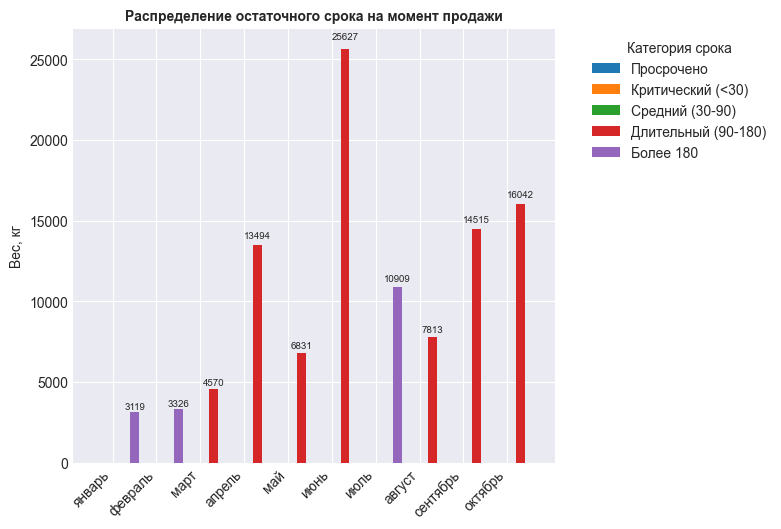

In [500]:
fig3 = plt.figure(figsize=(20, 20))

ax3 = plt.subplot(4, 3, 1)

pivot_weight = pd.pivot_table(df2, 
                               values='Вес',
                               index='Месяц',
                               columns='Категория срока годности',
                               aggfunc='sum',
                               fill_value=0)

order = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь']
pivot_weight = pivot_weight.reindex(order)

x = range(len(pivot_weight.index))
width = 0.2

for i, category in enumerate(pivot_weight.columns):
    bars = ax3.bar([pos + i*width for pos in x], 
                   pivot_weight[category].values,
                   width=width,
                   label=category)

ax3.set_title('Распределение остаточного срока на момент продажи', 
              fontsize=10, fontweight='bold')
ax3.set_ylabel('Вес, кг', fontsize=10)
ax3.set_xticks([pos + width*1.5 for pos in x])
ax3.set_xticklabels(pivot_weight.index, rotation=45, ha='right')
ax3.legend(title='Категория срока', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, category in enumerate(pivot_weight.columns):
    for j, month in enumerate(pivot_weight.index):
        value = pivot_weight.loc[month, category]
        if value > 0:
            ax3.text(j + i*width, value + value*0.02,
                    f'{value:.0f}',
                    ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

Построим график динамики продаж по месяцам

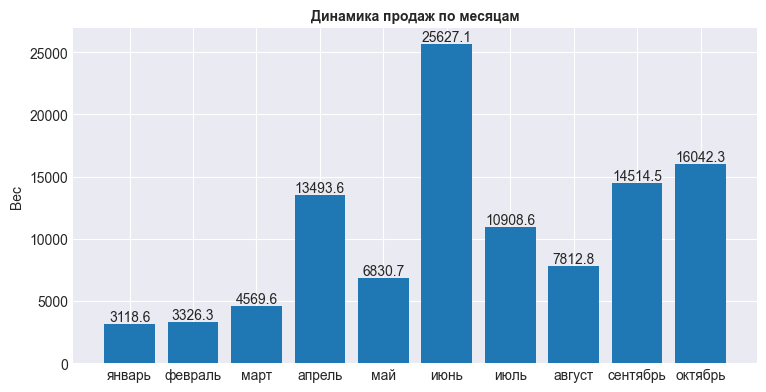

In [413]:
fig1 = plt.figure(figsize=(30, 20))

ax1 = plt.subplot(4, 3, 1)
order = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь']
weight = df2.groupby('Месяц')['Вес'].sum().reindex(order)
bars1 = ax1.bar(weight.index, weight.values)
ax1.set_title('Динамика продаж по месяцам', fontsize=10, fontweight='bold')
ax1.set_ylabel('Вес')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', 
             va='bottom')

In [419]:
peak_value = weight.max()
avg_value = weight.mean()

peak_vs_avg_percent = ((peak_value - avg_value) / avg_value) * 100

In [420]:
peak_vs_avg_percent

141.20971645758678

Из графика видно, что максимум продаж приходится на июнь. В июне объем продаж на 141% выше среднего объема продаж. Возможно, требуется проверка данных.

Построим круговую диаграмму продаж по каналам сбыта.

Text(0.5, 1.0, 'Доля каналов сбыта')

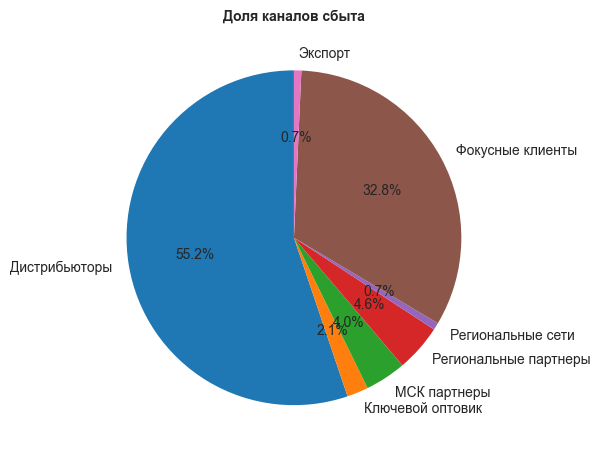

In [418]:
fig2 = plt.figure(figsize=(25, 25)) 
ax2 = plt.subplot(4, 3, 2)
channel_sales = df2.groupby('Канал сбыта')['Вес'].sum()
wedges, texts, autotexts = ax2.pie(channel_sales.values, labels=channel_sales.index, 
                                     autopct='%1.1f%%', startangle=90)
ax2.set_title('Доля каналов сбыта', fontsize=10, fontweight='bold')

Построим график продаж по менеджерам.

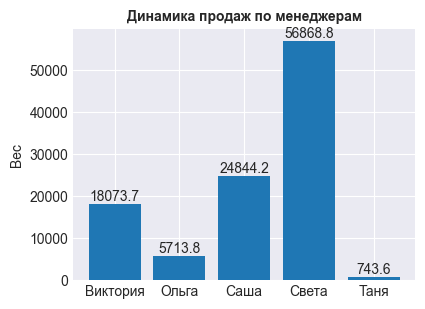

In [422]:
fig3 = plt.figure(figsize=(15, 15))

ax3 = plt.subplot(4, 3, 1)
weight = df2.groupby('Менеджер')['Вес'].sum()
bars3 = ax3.bar(weight.index, weight.values)
ax3.set_title('Динамика продаж по менеджерам', fontsize=10, fontweight='bold')
ax3.set_ylabel('Вес')

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', 
             va='bottom')

Посмотрим продажи по менеджерам и каналам сбыта.

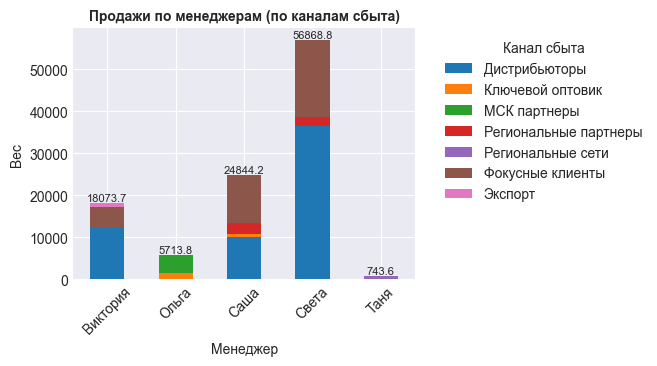

In [425]:
fig4 = plt.figure(figsize=(15, 15))

ax4 = plt.subplot(4, 3, 1)

pivot_manager_channel = pd.pivot_table(df2, 
                                        values='Вес',
                                        index='Менеджер',
                                        columns='Канал сбыта',
                                        aggfunc='sum',
                                        fill_value=0)

pivot_manager_channel.plot(kind='bar', stacked=True, ax=ax4, linewidth=0.5)

ax4.set_title('Продажи по менеджерам (по каналам сбыта)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Вес')
ax4.set_xlabel('Менеджер')
ax4.legend(title='Канал сбыта', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.tick_params(axis='x', rotation=45)

for i, manager in enumerate(pivot_manager_channel.index):
    total = pivot_manager_channel.loc[manager].sum()
    ax4.text(i, total + 1, f'{total:.1f}', 
             ha='center', va='bottom', fontsize=8)

## Вывод:

1. **Пик продаж приходится на июнь. В июне объем продаж на 141% выше среднего объема. Возможно, требуется проверка данных.**
2. **Каналы сбыта 'Экспорт', 'Региональные сети' показывает минимальную долю в структуре продаж — менее 1%. Эти направления развивают менеджеры Виктрия и Татьяна. Требуется оценить, являются ли эти направления новыми (тогда доля может быть оправдана) или зоной роста, которую можно усилить за счет дополнительных ресурсов или пересмотра стратегии работы.**
3.  **Средний срок годности товаров на момент продажи составляет 172 дня**